**Homework 4 Spring 202**

**Due Date** - **11/23/2022**

Your Name - Brian Sohn

Your UNI - bs3358

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pprint 
pp = pprint.PrettyPrinter(indent=4)
import warnings
warnings.filterwarnings("ignore")

# PART 2 CIFAR 10 Dataset

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). The train/test split is 50k/10k.

In [2]:
from tensorflow.keras.datasets import cifar10
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()

In [3]:
LABELS = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

2.1 Plot 5 samples from each class/label from train set on a 10*5 subplot

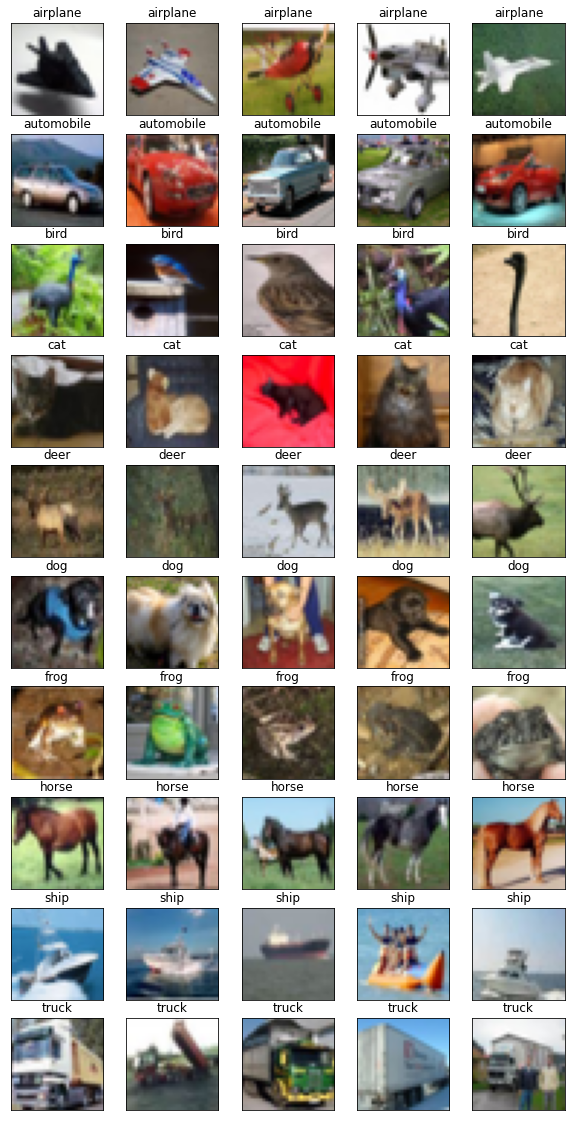

In [4]:
#Your code here
fig, axes = plt.subplots(10, 5, figsize=(10,20))

for i in range(10):
    images = np.where(y_dev==i)[0][:5]
    for j in range(5):
        axes[i,j].imshow(x_dev[images[j]])
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        axes[i,j].set_title(LABELS[i])

plt.show()

2.2  Preparing the dataset for CNN 

1) Print the shapes - $x_{dev}, y_{dev},x_{test},y_{test}$

2) Flatten the images into one-dimensional vectors and again print the shapes of $x_{dev}$,$x_{test}$

3) Standardize the development and test sets.

4) Train-test split your development set into train and validation sets (8:2 ratio).

In [5]:
#Your code here
from sklearn.model_selection import train_test_split

# Original Shapes
print('Original Shapes')
print(x_dev.shape, y_dev.shape, x_test.shape, y_test.shape)

# Flattened Shapes
print('Flattened Shapes')
x_dev = x_dev.reshape(50000, 32*32*3)
x_test = x_test.reshape(10000, 32*32*3)
print(x_dev.shape, x_test.shape)

# Standardize
x_dev = x_dev.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train, x_val, y_train, y_val = train_test_split(x_dev, y_dev, test_size = 0.2, random_state=42)


Original Shapes
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
Flattened Shapes
(50000, 3072) (10000, 3072)


In [6]:
# formatting y_train, y_val and y_test for model 

import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


2.3 Build the feed forward network 

First hidden layer size - 128

Second hidden layer size - 64

Third and last layer size - You should know this


In [7]:
#Your code here
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense

model = keras.Sequential([
    Dense(128, input_shape=(3072,), activation='relu'), 
    Dense(64, activation='relu'), 
    Dense(10, activation='softmax')
])

2.4) Print out the model summary. Can show show the calculation for each layer for estimating the number of parameters

In [8]:
#Your code here
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________


(3072+1) * 128 = 393344 <br>
(128+1) * 64 = 8256 <br>
(64+1) * 10 = 650

2.5) Do you think this number is dependent on the image height and width? 

In [9]:
# Your text here

# Yes, image height and width will determine the input size (3072 in this case), 
# which will determine the number of parameters for the first layer. 

**Printing out your model's output on first train sample. This will confirm if your dimensions are correctly set up. The sum of this output equal to 1 upto two decimal places?**

In [10]:
#modify name of X_train based on your requirement - I changed the variable name to x_train below. 

model.compile()
output = model.predict(x_train[0].reshape(1,-1))

# print(output)
print("Output: {:.2f}".format(sum(output[0])))

Output: 1.00


2.6) Using the right metric and  the right loss function, with Adam as the optimizer, train your model for 20 epochs with batch size 128.

In [12]:
#Your code here
model.compile("adam", "categorical_crossentropy", metrics=["accuracy"])
history_callback = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=128, epochs=20, verbose=1)

Epoch 1/20
313/313 [==============================] - 4s 10ms/step - loss: 1.3446 - accuracy: 0.5220 - val_loss: 1.4584 - val_accuracy: 0.4846
Epoch 2/20
313/313 [==============================] - 3s 10ms/step - loss: 1.3214 - accuracy: 0.5306 - val_loss: 1.4743 - val_accuracy: 0.4732
Epoch 3/20
313/313 [==============================] - 3s 8ms/step - loss: 1.3127 - accuracy: 0.5322 - val_loss: 1.5657 - val_accuracy: 0.4528
Epoch 4/20
313/313 [==============================] - 2s 8ms/step - loss: 1.3055 - accuracy: 0.5373 - val_loss: 1.4349 - val_accuracy: 0.4912
Epoch 5/20
313/313 [==============================] - 3s 9ms/step - loss: 1.2956 - accuracy: 0.5376 - val_loss: 1.4654 - val_accuracy: 0.4779
Epoch 6/20
313/313 [==============================] - 3s 9ms/step - loss: 1.2884 - accuracy: 0.5434 - val_loss: 1.4622 - val_accuracy: 0.4767
Epoch 7/20
313/313 [==============================] - 3s 9ms/step - loss: 1.2803 - accuracy: 0.5433 - val_loss: 1.4730 - val_accuracy: 0.4833
Epoc

2.7) Plot a separate plots for:

a. displaying train vs validation loss over each epoch

b. displaying train vs validation accuracy over each epoch 

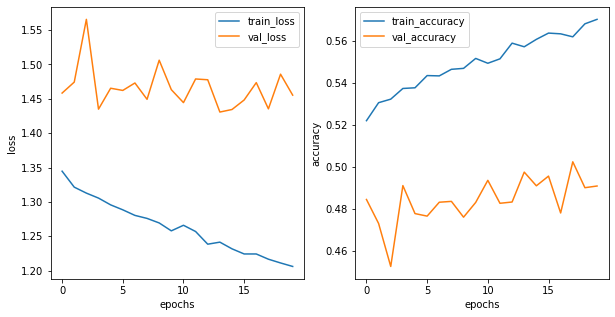

In [22]:
#Your code here
import pandas as pd

hist = pd.DataFrame(history_callback.history)
fig, axes = plt.subplots(1,2, figsize=(10,5))

axes[0].plot(hist.index, hist['loss'])
axes[0].plot(hist.index, hist['val_loss'])
axes[0].set_ylabel('loss')
axes[0].set_xlabel('epochs')
axes[0].legend(['train_loss', 'val_loss'])

axes[1].plot(hist.index, hist['accuracy'])
axes[1].plot(hist.index, hist['val_accuracy'])
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epochs')
axes[1].legend(['train_accuracy', 'val_accuracy'])


plt.show()

2.8) Finally, report the metric chosen on test set.

In [24]:
#Your code here
score = model.evaluate(x_test, y_test, verbose=0)

print('Test Loss: {:.3f}'.format(score[0]))
print('Test Accuracy: {:.3f}'.format(score[1]))

Test Loss: 1.447
Test Accuracy: 0.496


2.9 If the accuracy achieved is quite less(<50%), try improve the accuracy [Open ended question, you may try different approaches]

In [39]:
#Your code here
# I have added another layer to the model which improved test accuracy. 
model2 = keras.Sequential([
    Dense(512, input_shape=(3072,), activation='relu'), 
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model2.compile("adam", "categorical_crossentropy", metrics=["accuracy"])
history_callback2 = model2.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=128, epochs=20, verbose=1)

Epoch 1/20
313/313 [==============================] - 8s 23ms/step - loss: 1.9520 - accuracy: 0.2977 - val_loss: 1.8058 - val_accuracy: 0.3594
Epoch 2/20
313/313 [==============================] - 7s 22ms/step - loss: 1.7490 - accuracy: 0.3732 - val_loss: 1.7572 - val_accuracy: 0.3737
Epoch 3/20
313/313 [==============================] - 7s 23ms/step - loss: 1.6659 - accuracy: 0.4045 - val_loss: 1.6729 - val_accuracy: 0.3975
Epoch 4/20
313/313 [==============================] - 7s 23ms/step - loss: 1.6003 - accuracy: 0.4278 - val_loss: 1.5737 - val_accuracy: 0.4398
Epoch 5/20
313/313 [==============================] - 7s 21ms/step - loss: 1.5511 - accuracy: 0.4482 - val_loss: 1.5574 - val_accuracy: 0.4407
Epoch 6/20
313/313 [==============================] - 7s 22ms/step - loss: 1.5101 - accuracy: 0.4626 - val_loss: 1.5833 - val_accuracy: 0.4328
Epoch 7/20
313/313 [==============================] - 8s 24ms/step - loss: 1.4782 - accuracy: 0.4709 - val_loss: 1.5215 - val_accuracy: 0.4548

In [41]:
print('Test Accuracy: {:.3f}'.format(model2.evaluate(x_test, y_test, verbose=0)[1]))

Test Accuracy: 0.513


2.10 Plot the first 50 samples of test dataset on a 10*5 subplot and this time label the images with both the ground truth (GT) and predicted class (P). (Make sure you predict the class with the improved model)

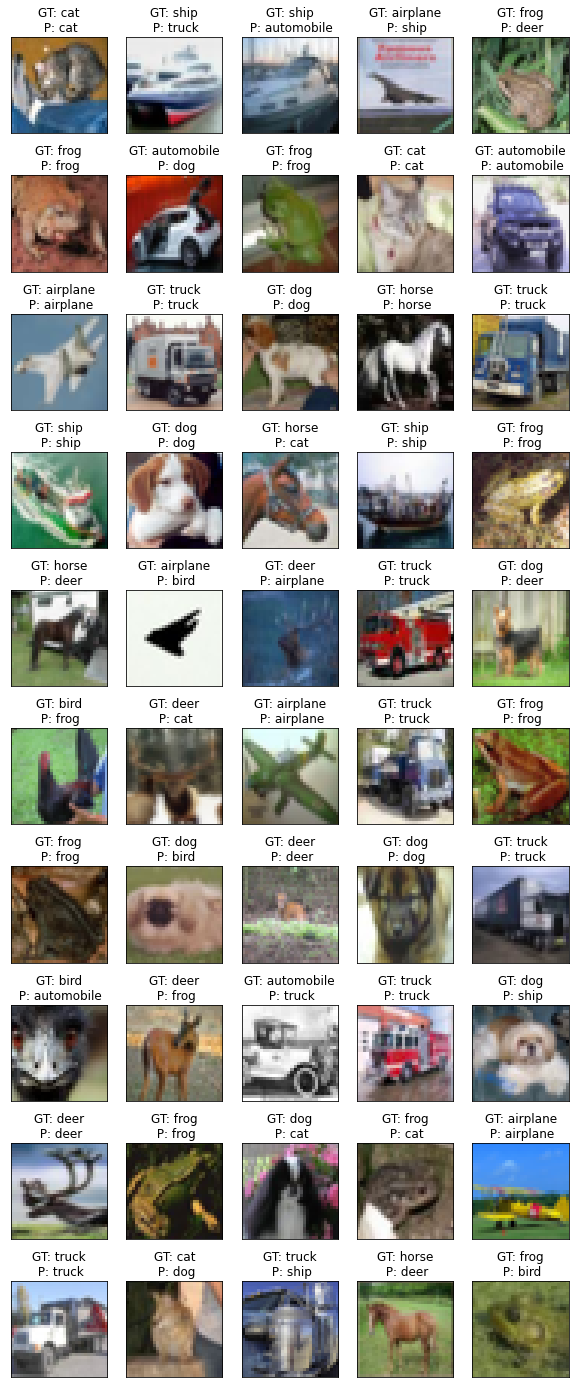

In [62]:
#Your code here

images = x_test.reshape(10000,32,32,3)[:50]
y_true = np.argmax(y_test[:50], axis=1)
y_pred = np.argmax(model2.predict(x_test[:50]), axis=1)

fig, axes = plt.subplots(10, 5, figsize=(10,25))

for i in range(10):
    for j in range(5):
        axes[i,j].imshow(images[5*i + j])
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        axes[i,j].set_title('GT: ' + LABELS[y_true[5*i + j]] + '\n P: ' + LABELS[y_pred[5*i + j]])

plt.show()

# PART 3 Convolutional Neural Network

In this part of the homework, we will build and train a classical convolutional neural network on the CIFAR Dataset

In [63]:
from tensorflow.keras.datasets import cifar10
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()
print("x_dev: {},y_dev: {},x_test: {},y_test: {}".format(x_dev.shape, y_dev.shape, x_test.shape, y_test.shape))

x_dev, x_test = x_dev.astype('float32'), x_test.astype('float32')
x_dev = x_dev/255.0
x_test = x_test/255.0


from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_dev, y_dev,test_size = 0.2, random_state = 42)


x_dev: (50000, 32, 32, 3),y_dev: (50000, 1),x_test: (10000, 32, 32, 3),y_test: (10000, 1)


In [64]:
# we also reshape the y variables to fit into the model
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

3.1 We will be implementing the one of the first CNN models put forward by Yann LeCunn, which is commonly refered to as LeNet-5. The network has the following layers:

1) 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1 padded to yield the same size as input, ReLU activation

2) Maxpooling layer of 2x2

3) 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation

4 )Maxpooling layer of 2x2

5) 2D convolutional layer with 120 filters, 5x5 kernel, ReLU activation. Note that this layer has 120 output channels (filters), and each channel has only 1 number. The output of this layer is just a vector with 120 units!

6) A fully connected layer with 84 units, ReLU activation

7) The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer? (You should know this)


In [68]:
# your code here
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten
cnn = keras.Sequential([
    Conv2D(6, kernel_size=(5,5), activation='relu', strides=(1,1), padding='same', input_shape=(32,32,3)), 
    MaxPool2D(pool_size=(2,2)), 
    Conv2D(16, kernel_size=(5,5), activation='relu'), 
    MaxPool2D(pool_size=(2,2)), 
    Conv2D(120, kernel_size=(5,5), activation='relu'), 
    Flatten(), 
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

3.2 Report the model summary 

In [69]:
#your code here
cnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 6)        0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 2, 2, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 480)              

3.3 Model Training

1) Train the model for 20 epochs. In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets.

2) Plot a separate plots for:

* displaying train vs validation loss over each epoch
* displaying train vs validation accuracy over each epoch

3) Report the model performance on the test set. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

In [71]:
# Your code here
cnn.compile("adam", "categorical_crossentropy", metrics=["accuracy"])
history_callback3 = cnn.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=128, epochs=20, verbose=1)

Epoch 1/20
313/313 [==============================] - 26s 81ms/step - loss: 1.7468 - accuracy: 0.3657 - val_loss: 1.5028 - val_accuracy: 0.4526
Epoch 2/20
313/313 [==============================] - 24s 76ms/step - loss: 1.4457 - accuracy: 0.4793 - val_loss: 1.3752 - val_accuracy: 0.5030
Epoch 3/20
313/313 [==============================] - 28s 88ms/step - loss: 1.3351 - accuracy: 0.5191 - val_loss: 1.3206 - val_accuracy: 0.5290
Epoch 4/20
313/313 [==============================] - 25s 79ms/step - loss: 1.2515 - accuracy: 0.5545 - val_loss: 1.2364 - val_accuracy: 0.5559
Epoch 5/20
313/313 [==============================] - 26s 84ms/step - loss: 1.1854 - accuracy: 0.5788 - val_loss: 1.2399 - val_accuracy: 0.5597
Epoch 6/20
313/313 [==============================] - 26s 82ms/step - loss: 1.1433 - accuracy: 0.5942 - val_loss: 1.1697 - val_accuracy: 0.5856
Epoch 7/20
313/313 [==============================] - 27s 86ms/step - loss: 1.0892 - accuracy: 0.6166 - val_loss: 1.1724 - val_accuracy:

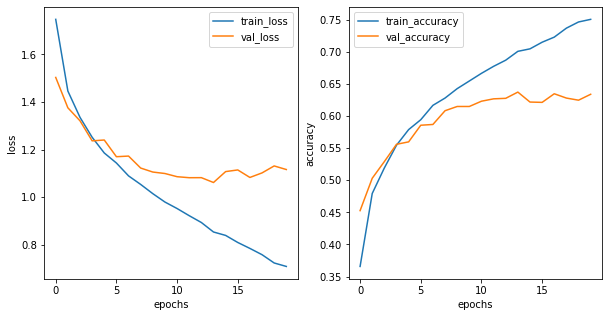

In [72]:
hist = pd.DataFrame(history_callback3.history)
fig, axes = plt.subplots(1,2, figsize=(10,5))

axes[0].plot(hist.index, hist['loss'])
axes[0].plot(hist.index, hist['val_loss'])
axes[0].set_ylabel('loss')
axes[0].set_xlabel('epochs')
axes[0].legend(['train_loss', 'val_loss'])

axes[1].plot(hist.index, hist['accuracy'])
axes[1].plot(hist.index, hist['val_accuracy'])
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epochs')
axes[1].legend(['train_accuracy', 'val_accuracy'])


plt.show()

In [73]:
score = cnn.evaluate(x_test, y_test, verbose=0)

print('Test Loss: {:.3f}'.format(score[0]))
print('Test Accuracy: {:.3f}'.format(score[1]))

Test Loss: 1.096
Test Accuracy: 0.632


3.4 Overfitting

1) To overcome overfitting, we will train the network again with dropout this time. For hidden layers use dropout probability of 0.3. Train the model again for 20 epochs. Report model performance on test set. 

Plot a separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch 

2) This time, let's apply a batch normalization after every hidden layer, train the model for 20 epochs, report model performance on test set as above. 

Plot a separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch 

3) Compare batch normalization technique with the original model and with dropout, which technique do you think helps with overfitting better?

In [90]:
# Your code here
from tensorflow.keras.layers import Dropout

cnn_dropout = keras.Sequential([
    Conv2D(6, kernel_size=(5,5), activation='relu', strides=(1,1), padding='same', input_shape=(32,32,3)), 
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.3),
    Conv2D(16, kernel_size=(5,5), activation='relu'), 
    MaxPool2D(pool_size=(2,2)), 
    Dropout(0.3),
    Conv2D(120, kernel_size=(5,5), activation='relu'), 
    Dropout(0.3),
    Flatten(), 
    Dense(84, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

cnn_dropout.compile("adam", "categorical_crossentropy", metrics=["accuracy"])
history_callback4 = cnn_dropout.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=128, epochs=20, verbose=1)

Epoch 1/20
313/313 [==============================] - 27s 82ms/step - loss: 1.9662 - accuracy: 0.2599 - val_loss: 1.6840 - val_accuracy: 0.3879
Epoch 2/20
313/313 [==============================] - 25s 81ms/step - loss: 1.6584 - accuracy: 0.3939 - val_loss: 1.5160 - val_accuracy: 0.4513
Epoch 3/20
313/313 [==============================] - 27s 85ms/step - loss: 1.5486 - accuracy: 0.4349 - val_loss: 1.3988 - val_accuracy: 0.4961
Epoch 4/20
313/313 [==============================] - 32s 102ms/step - loss: 1.4860 - accuracy: 0.4597 - val_loss: 1.3452 - val_accuracy: 0.5152
Epoch 5/20
313/313 [==============================] - 26s 83ms/step - loss: 1.4314 - accuracy: 0.4813 - val_loss: 1.3141 - val_accuracy: 0.5301
Epoch 6/20
313/313 [==============================] - 28s 89ms/step - loss: 1.3980 - accuracy: 0.4962 - val_loss: 1.2872 - val_accuracy: 0.5444
Epoch 7/20
313/313 [==============================] - 28s 90ms/step - loss: 1.3673 - accuracy: 0.5110 - val_loss: 1.2427 - val_accuracy

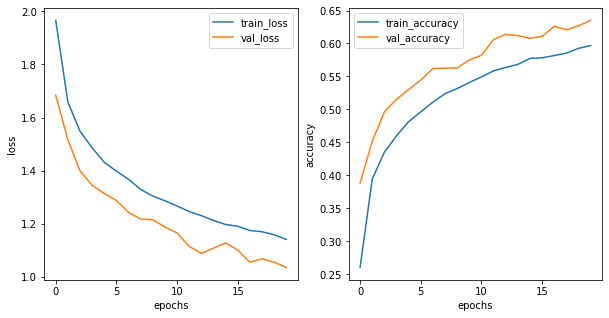

In [91]:
hist = pd.DataFrame(history_callback4.history)
fig, axes = plt.subplots(1,2, figsize=(10,5))

axes[0].plot(hist.index, hist['loss'])
axes[0].plot(hist.index, hist['val_loss'])
axes[0].set_ylabel('loss')
axes[0].set_xlabel('epochs')
axes[0].legend(['train_loss', 'val_loss'])

axes[1].plot(hist.index, hist['accuracy'])
axes[1].plot(hist.index, hist['val_accuracy'])
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epochs')
axes[1].legend(['train_accuracy', 'val_accuracy'])


plt.show() 

In [92]:
score = cnn_dropout.evaluate(x_test, y_test, verbose=0)

print('Test Loss: {:.3f}'.format(score[0]))
print('Test Accuracy: {:.3f}'.format(score[1])) 

Test Loss: 1.039
Test Accuracy: 0.635


In [93]:
from tensorflow.keras.layers import BatchNormalization

cnn_bn = keras.Sequential([
    Conv2D(6, kernel_size=(5,5), activation='relu', strides=(1,1), padding='same', input_shape=(32,32,3)), 
    MaxPool2D(pool_size=(2,2)),
    BatchNormalization(),
    Conv2D(16, kernel_size=(5,5), activation='relu'), 
    MaxPool2D(pool_size=(2,2)), 
    BatchNormalization(),
    Conv2D(120, kernel_size=(5,5), activation='relu'), 
    BatchNormalization(),
    Flatten(), 
    Dense(84, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

cnn_bn.compile("adam", "categorical_crossentropy", metrics=["accuracy"])
history_callback5 = cnn_bn.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=128, epochs=20, verbose=1)

Epoch 1/20
313/313 [==============================] - 32s 95ms/step - loss: 1.5242 - accuracy: 0.4592 - val_loss: 1.7013 - val_accuracy: 0.4041
Epoch 2/20
313/313 [==============================] - 26s 84ms/step - loss: 1.1891 - accuracy: 0.5752 - val_loss: 1.2750 - val_accuracy: 0.5380
Epoch 3/20
313/313 [==============================] - 30s 97ms/step - loss: 1.0403 - accuracy: 0.6320 - val_loss: 1.3103 - val_accuracy: 0.5733
Epoch 4/20
313/313 [==============================] - 29s 93ms/step - loss: 0.9442 - accuracy: 0.6684 - val_loss: 1.1774 - val_accuracy: 0.5847
Epoch 5/20
313/313 [==============================] - 30s 94ms/step - loss: 0.8618 - accuracy: 0.6984 - val_loss: 1.2163 - val_accuracy: 0.5808
Epoch 6/20
313/313 [==============================] - 29s 93ms/step - loss: 0.7778 - accuracy: 0.7271 - val_loss: 1.1695 - val_accuracy: 0.6123
Epoch 7/20
313/313 [==============================] - 30s 96ms/step - loss: 0.7196 - accuracy: 0.7486 - val_loss: 1.1779 - val_accuracy:

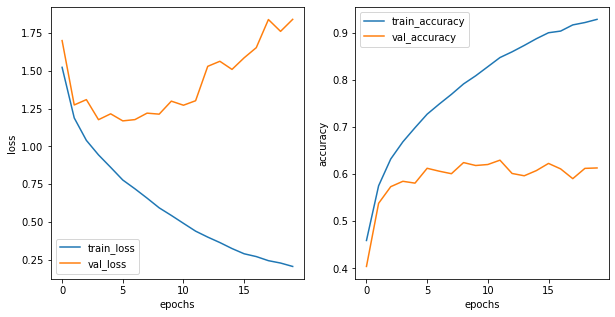

In [94]:
hist = pd.DataFrame(history_callback5.history)
fig, axes = plt.subplots(1,2, figsize=(10,5))

axes[0].plot(hist.index, hist['loss'])
axes[0].plot(hist.index, hist['val_loss'])
axes[0].set_ylabel('loss')
axes[0].set_xlabel('epochs')
axes[0].legend(['train_loss', 'val_loss'])

axes[1].plot(hist.index, hist['accuracy'])
axes[1].plot(hist.index, hist['val_accuracy'])
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epochs')
axes[1].legend(['train_accuracy', 'val_accuracy'])


plt.show() 

In [95]:
score = cnn_bn.evaluate(x_test, y_test, verbose=0)

print('Test Loss: {:.3f}'.format(score[0]))
print('Test Accuracy: {:.3f}'.format(score[1])) 

Test Loss: 1.804
Test Accuracy: 0.617


In [96]:
# Dropout seems to be dealing with overfitting the best. 
# In the baseline model, even though the train loss is decreasing, validation loss has stopped decreasing, which means more training will just overfit the model to the train data. 
# In the batch normalization model, the situation is worse since val loss is increasing as train loss decreases. This is clearly a overfitted model. 
# On the other hand, the dropout model does not depict this behavior and the val loss continues to decrease. 